<a href="https://colab.research.google.com/github/Bhramari1225/Stock_Price_Prediction_Analysis/blob/main/StockPrice_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection**

[*********************100%***********************]  1 of 1 completed


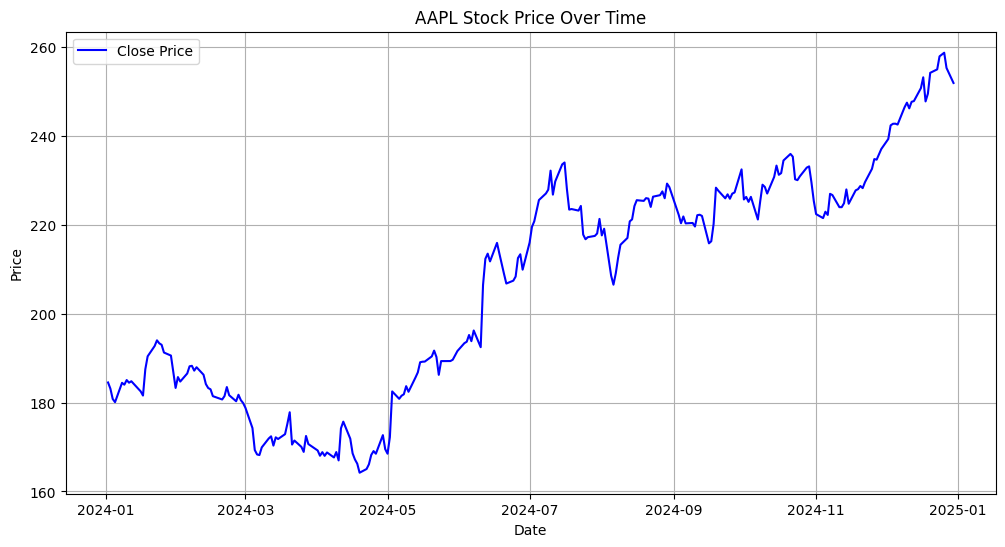

In [41]:
# Code Snippet: Fetching and Preparing Stock Data
import yfinance as yf
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Fetch historical stock data using Yahoo Finance API
stock_symbol = 'AAPL' # Replace with your desired stock symbol
start_date = '2024-01-01'
end_date = '2024-12-31'
stock_data = yf.download(stock_symbol, start= start_date, end=end_date)

# Feature engineering — assuming ‘Close’ is the target variable and other columns are features
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Splitting the data into features and target variable
X = stock_data[features]
y = stock_data[target]

# Convert data to NumPy arrays for scaling
X_np = X.values
y_np = y.values

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.title(f'{stock_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


**Data Preprocessing & Model Development**

In [43]:
# Code Snippet: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

**Contruction & Traing the Predictive Model**

In [44]:
# Code Snippet: Random Forest Model Creation and Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_np)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

**Making Predictions**

In [45]:
# Code Snippet: Making Predictions for Multiple Data Points with Dates
import numpy as np

# Choose the number of data points to predict for
num_predictions = 5

# Select the last 'num_predictions' data points and corresponding dates
last_data_points = X_np[-num_predictions:]
last_dates = stock_data.index[-num_predictions:]  # Get the dates

# Scale the selected data points
scaled_last_data_points = scaler.transform(last_data_points)

# Make predictions
predicted_prices = rf.predict(scaled_last_data_points)

# Print the predicted prices with dates
for date, price in zip(last_dates, predicted_prices):
    print(f"Predicted Close Price for {stock_symbol} on {date.date()}: {price}")

Predicted Close Price for AAPL on 2024-12-23: 255.04698883056642
Predicted Close Price for AAPL on 2024-12-24: 257.27334335327146
Predicted Close Price for AAPL on 2024-12-26: 258.12548767089845
Predicted Close Price for AAPL on 2024-12-27: 255.99993576049803
Predicted Close Price for AAPL on 2024-12-30: 252.04867767333985


**Evaluating Model Performance and Future Enhancement**

In [50]:
# Code Snippet: Model Evaluation (Example)
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'y_test' or a portion of 'y_np' should be the true values
true_values = y_np[-num_predictions:]  # Use the last 'num_predictions' values of y_np for comparison

# Calculate Mean Squared Error
mse = mean_squared_error(true_values, predicted_prices)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5063117757822504
